In [17]:
# Install require package
!pip install numpy pandas matplotlib scikit-learn

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


seed = 220202022
np.random.seed(seed)




In [19]:
# Define the function to generate y values with noise
def generate_dataset():
    # Generate input values x in the range [0, 1]
    x_train = np.random.uniform(0, 1, num_points)
    x_test = np.random.uniform(0, 1, num_points)
    
    # Generate noise ε from normal distribution N(0, σ)
    noise_train = np.random.normal(0, sigma, num_points)
    noise_test = np.random.normal(0, sigma, num_points)
    
    # Calculate target values y = sin(1 + x^2) + ε
    y_train = np.sin(1 + x_train**2) + noise_train
    y_test = np.sin(1 + x_test**2) + noise_test
    
    return (x_train, y_train), (x_test, y_test)

def plot_datasets(datasets):
    fig, axes = plt.subplots(1, num_datasets, figsize=(15, 5))
    
    for i, dataset in enumerate(datasets):
        train_set, test_set = dataset['train'], dataset['test']
        
        axes[i].scatter(train_set[0], train_set[1], color='blue', label='Train')
        axes[i].scatter(test_set[0], test_set[1], color='red', label='Test')
        axes[i].set_title(f"Dataset {i+1}")
        axes[i].set_xlabel('x')
        axes[i].set_ylabel('y')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()

In [20]:
def calculate_errors_and_create_table(datasets, max_degree=9):
    results = []

    for i, dataset in enumerate(datasets):
        train_set, test_set = dataset['train'], dataset['test']
        x_train, y_train = train_set
        x_test, y_test = test_set
        
        error_results = []

        for degree in range(1, max_degree + 1):
            # Create a pipeline with polynomial features and linear regression
            model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
            
            # Train the model
            model.fit(x_train.reshape(-1, 1), y_train)
            
            # Predict and calculate errors
            y_train_pred = model.predict(x_train.reshape(-1, 1))
            y_test_pred = model.predict(x_test.reshape(-1, 1))
            
            E_in = mean_squared_error(y_train, y_train_pred)
            E_out = mean_squared_error(y_test, y_test_pred)
            
            error_results.append((f'h{degree}', round(E_in, 5), round(E_out, 5)))
        
        # Create DataFrame for better visualization
        df = pd.DataFrame(error_results, columns=['Fit Round', 'E_in', 'E_out'])
        results.append((i + 1, df))
        
    return results

In [21]:
def plot_polynomial_fits(datasets, max_degree=9):
    for i, dataset in enumerate(datasets):
        train_set, test_set = dataset['train'], dataset['test']
        x_train, y_train = train_set
        x_test, y_test = test_set

        x_range = np.linspace(0, 1, 100).reshape(-1, 1)

        fig, axs = plt.subplots(3, 3, figsize=(15, 15))
        axs = axs.flatten()

        for degree in range(1, max_degree + 1):
            model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
            model.fit(x_train.reshape(-1, 1), y_train)

            y_range_pred = model.predict(x_range)

            axs[degree - 1].scatter(x_train, y_train, color='blue', label='Train', alpha=0.7)
            axs[degree - 1].scatter(x_test, y_test, color='red', label='Test', alpha=0.7)
            axs[degree - 1].plot(x_range, y_range_pred, color='black')
            axs[degree - 1].set_title(f'Degree {degree} Polynomial')
            axs[degree - 1].set_ylim(0.7, 1.1)  # Adjust the y-axis limits for better visualization
        
        plt.suptitle(f"Polynomial Fits for Dataset {i+1}", fontsize=16)
        handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right')
        plt.show()

### Kích thước dataset là 10 điểm

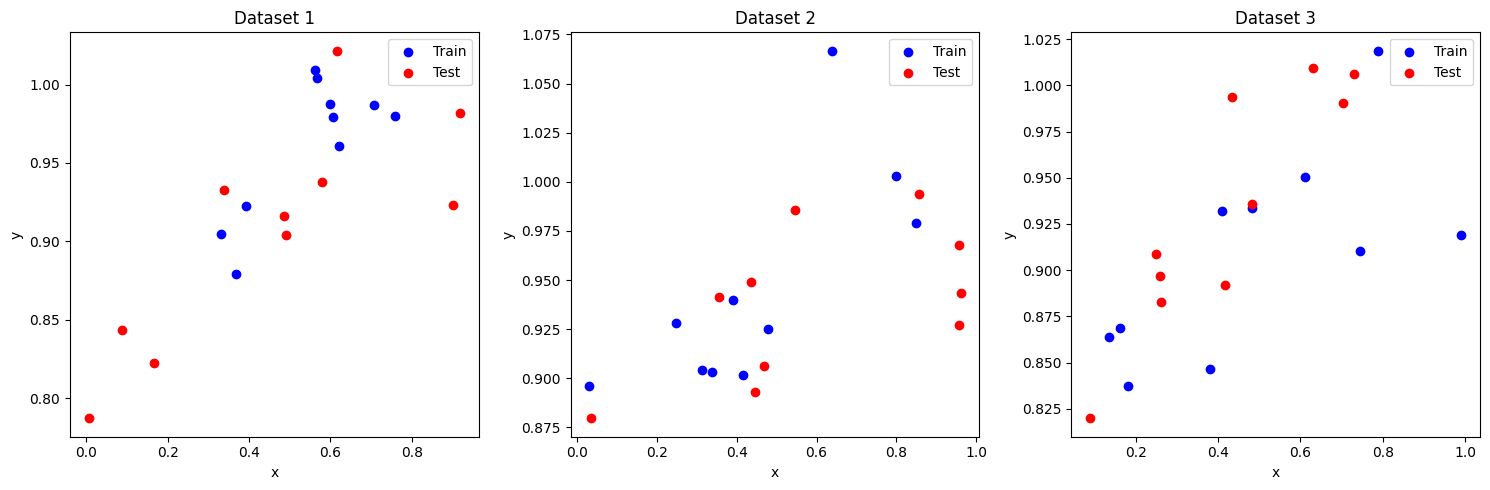

Dataset 1:

  Fit Round     E_in         E_out
0        h1  0.00067  2.990000e-03
1        h2  0.00033  1.156000e-02
2        h3  0.00033  9.880000e-03
3        h4  0.00021  1.520950e+00
4        h5  0.00002  1.737349e+02
5        h6  0.00001  4.866135e+02
6        h7  0.00000  5.049198e+04
7        h8  0.00000  7.769530e+06
8        h9  0.00000  7.545380e+09

--------------------------------------------------

Dataset 2:

  Fit Round     E_in         E_out
0        h1  0.00128       0.00256
1        h2  0.00127       0.00299
2        h3  0.00080       0.00153
3        h4  0.00035       0.03632
4        h5  0.00024       0.00081
5        h6  0.00015       0.07397
6        h7  0.00008       2.39264
7        h8  0.00007      66.73571
8        h9  0.00000  151645.76282

--------------------------------------------------

Dataset 3:

  Fit Round     E_in    E_out
0        h1  0.00149  0.00265
1        h2  0.00121  0.00174
2        h3  0.00097  0.00196
3        h4  0.00096  0.00237
4       

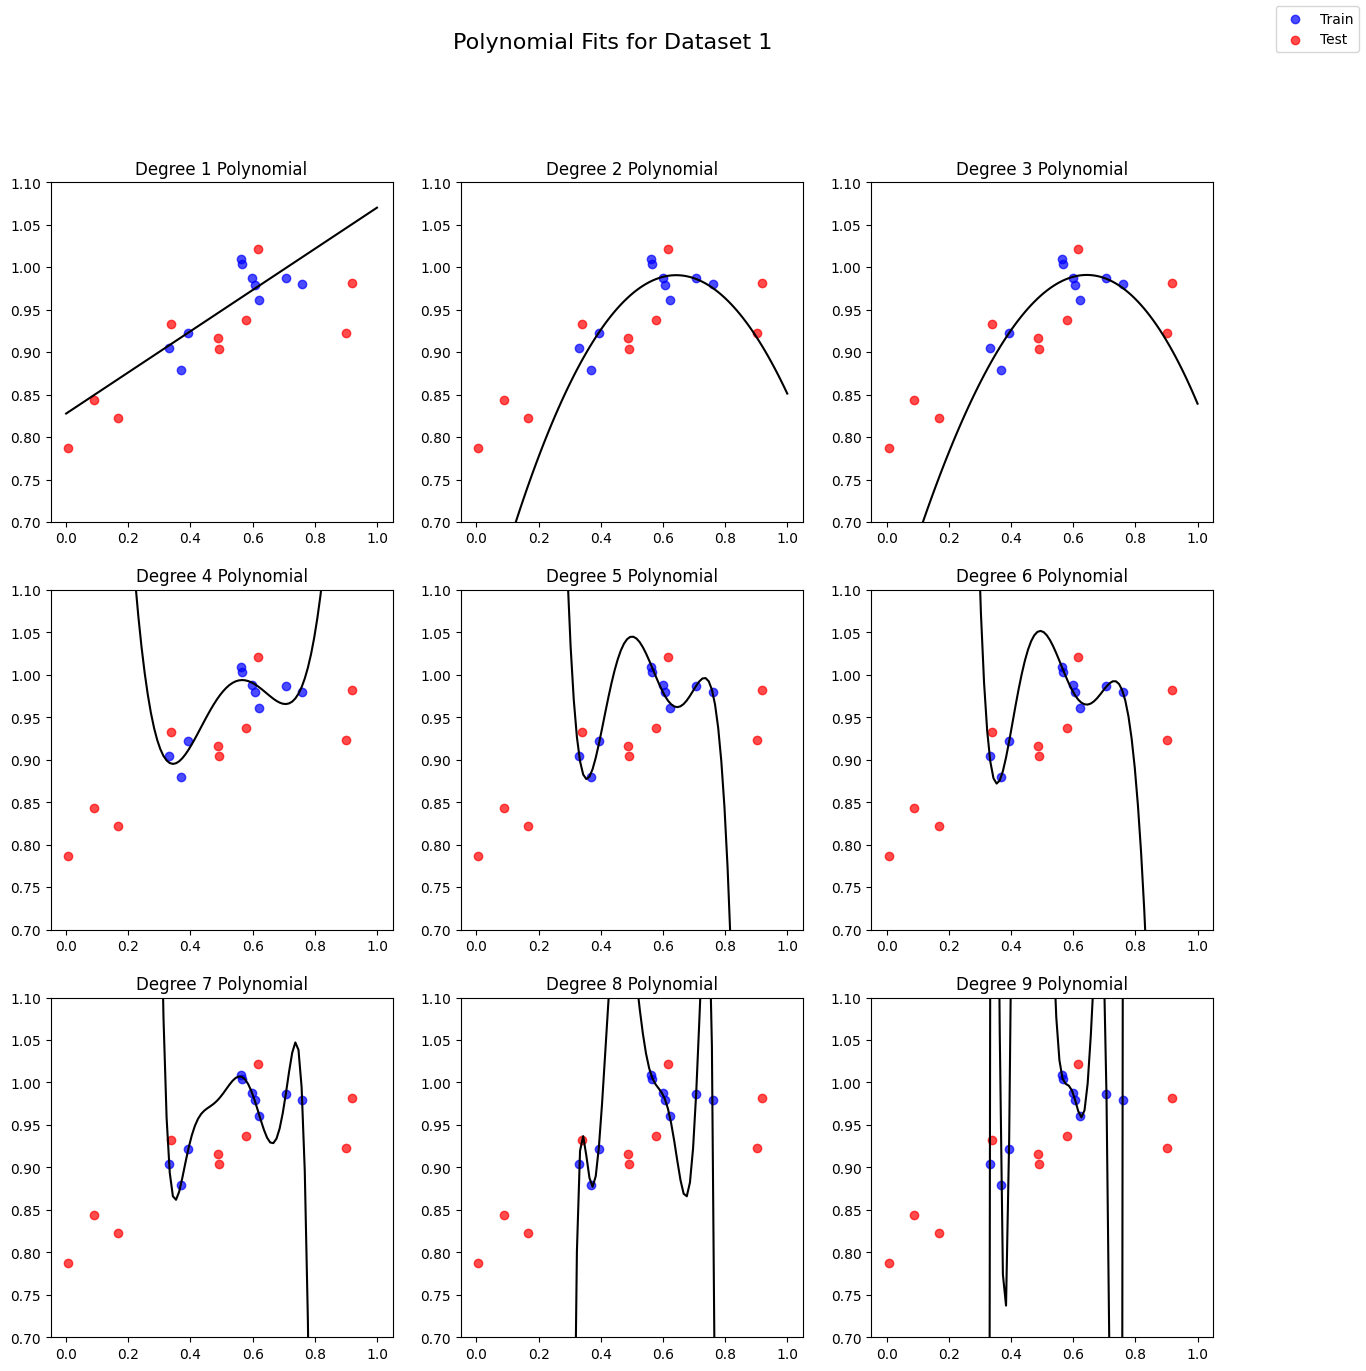

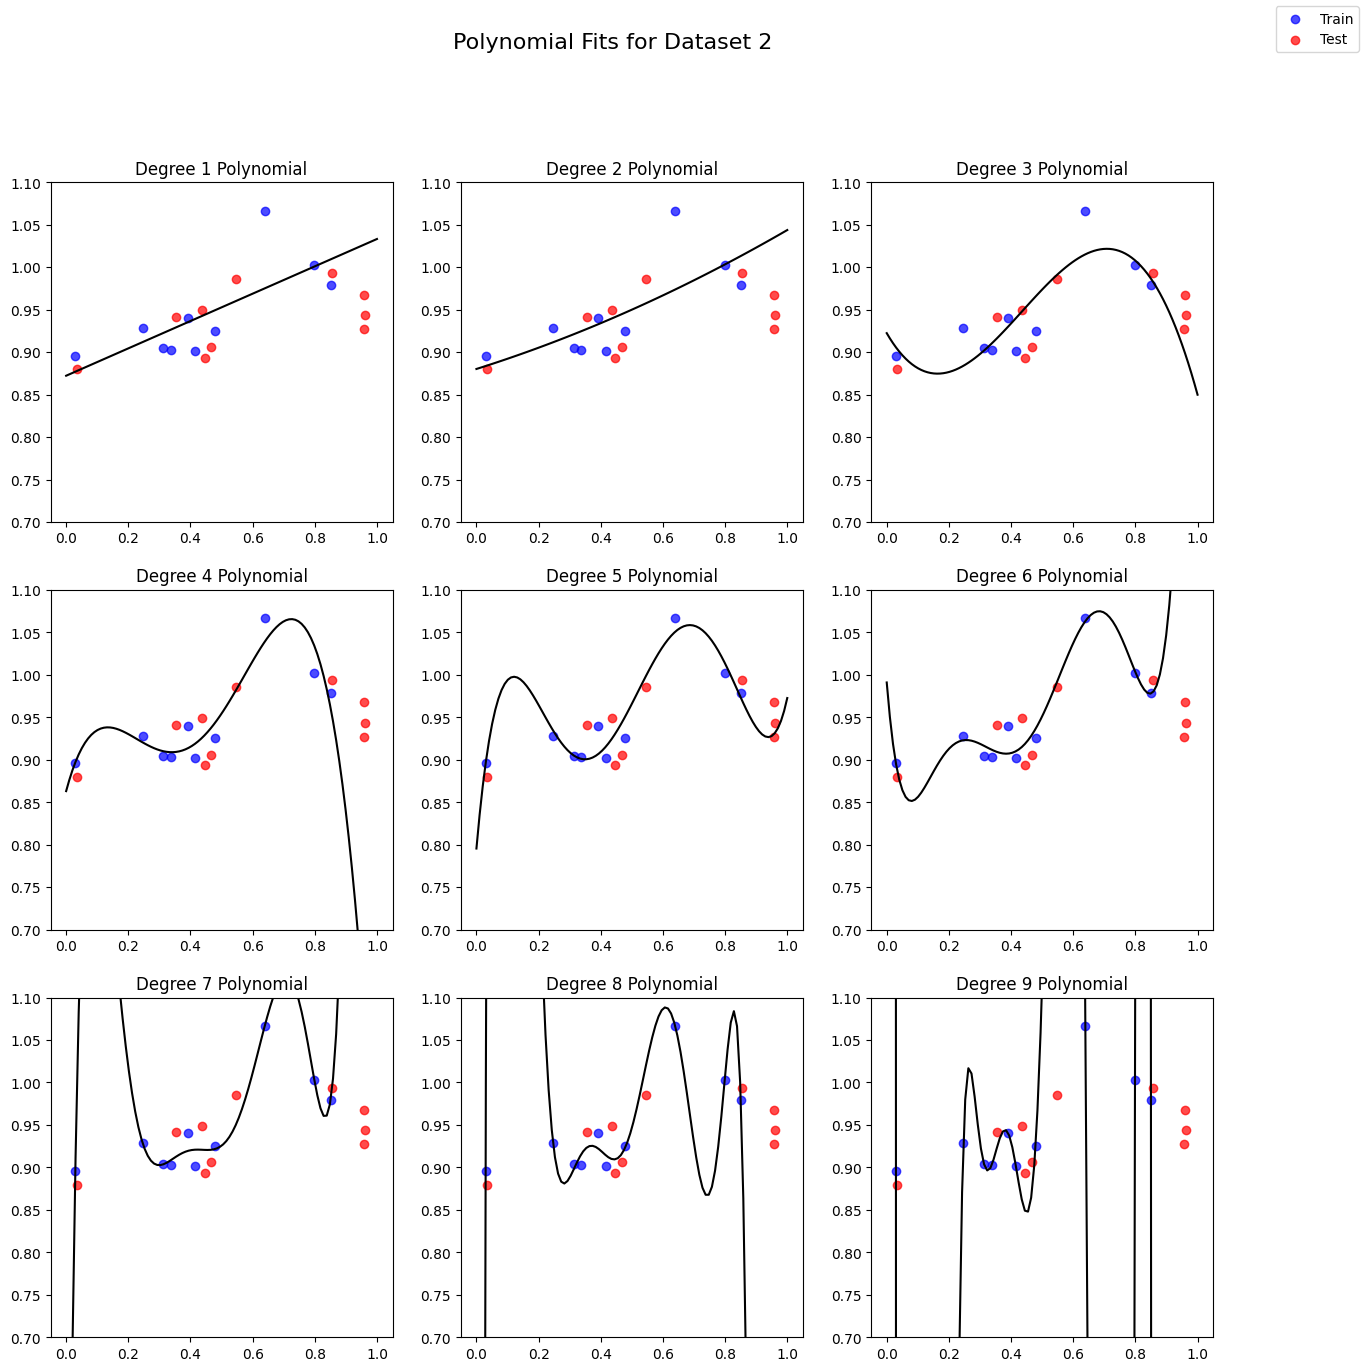

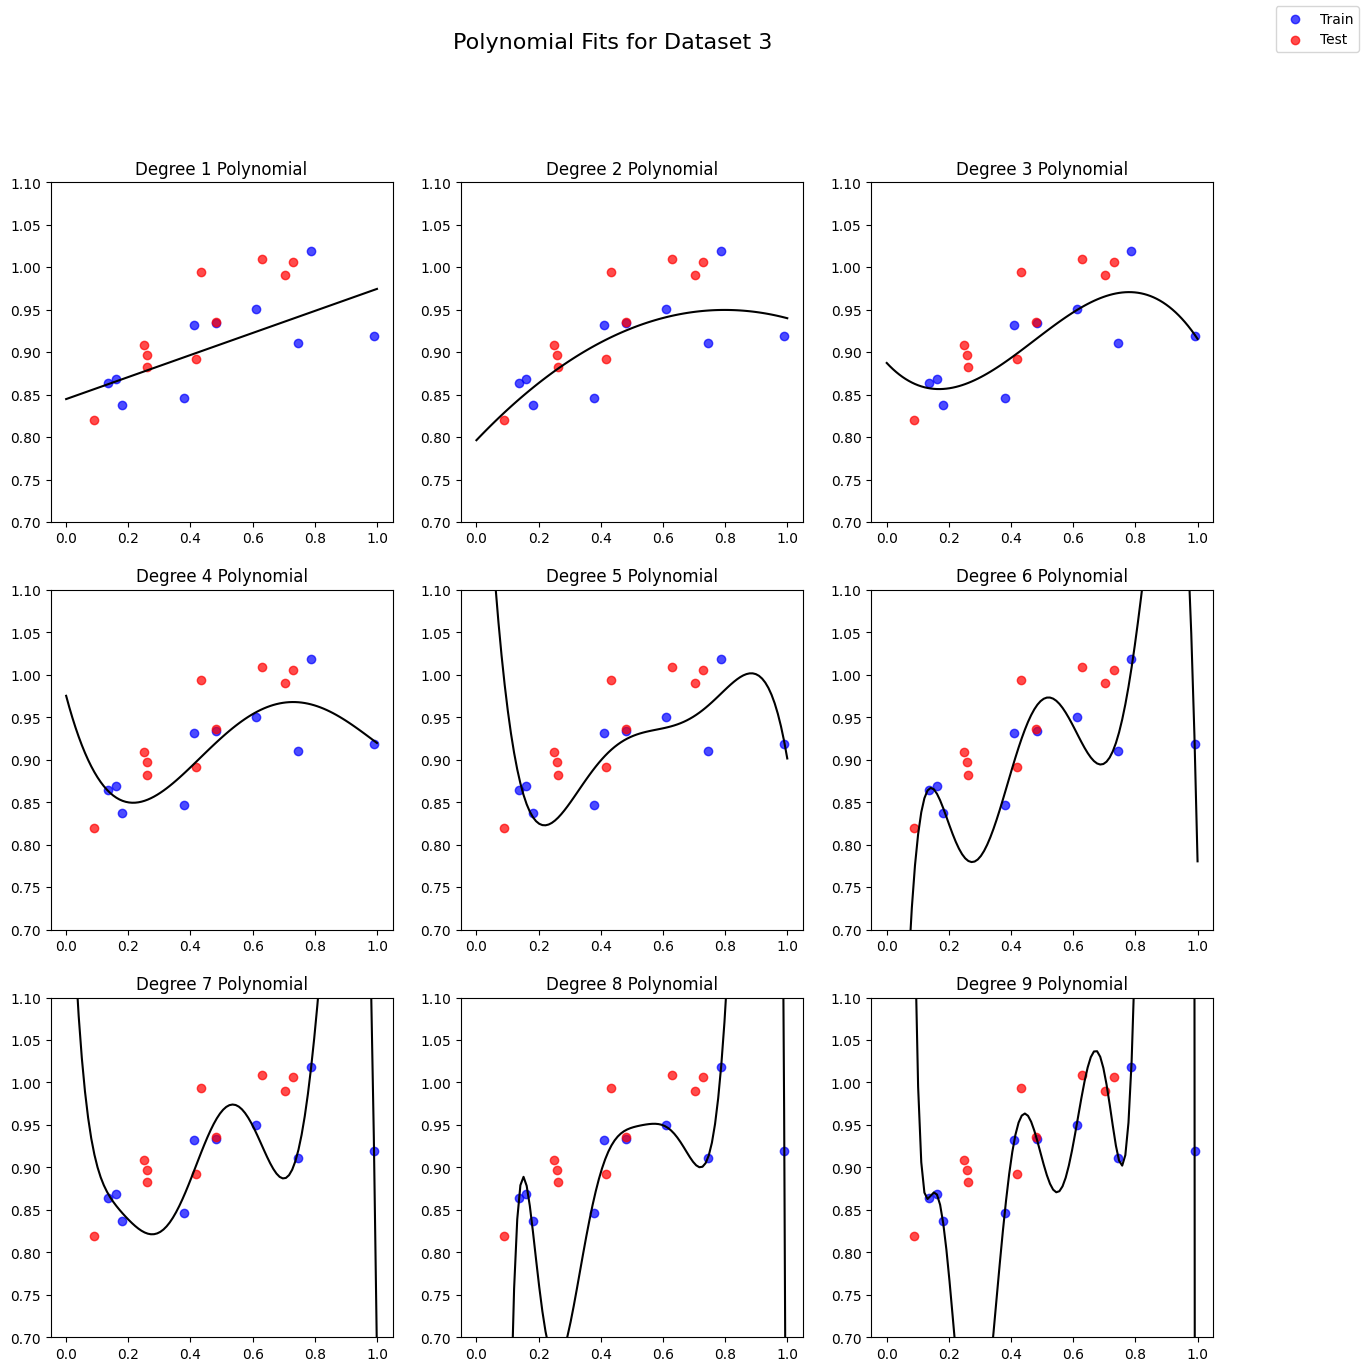

In [22]:
num_datasets = 3
num_points = 10
sigma = 0.03

datasets = []

for _ in range(num_datasets):
    train_set, test_set = generate_dataset()
    datasets.append({'train': train_set, 'test': test_set})

plot_datasets(datasets)

results = calculate_errors_and_create_table(datasets)

# Print results
for dataset_num, df in results:
    print(f"Dataset {dataset_num}:\n")
    print(df)
    print("\n" + "-"*50 + "\n")

# Plot polynomial fits
plot_polynomial_fits(datasets)

### Kích thước dataset là 100 điểm

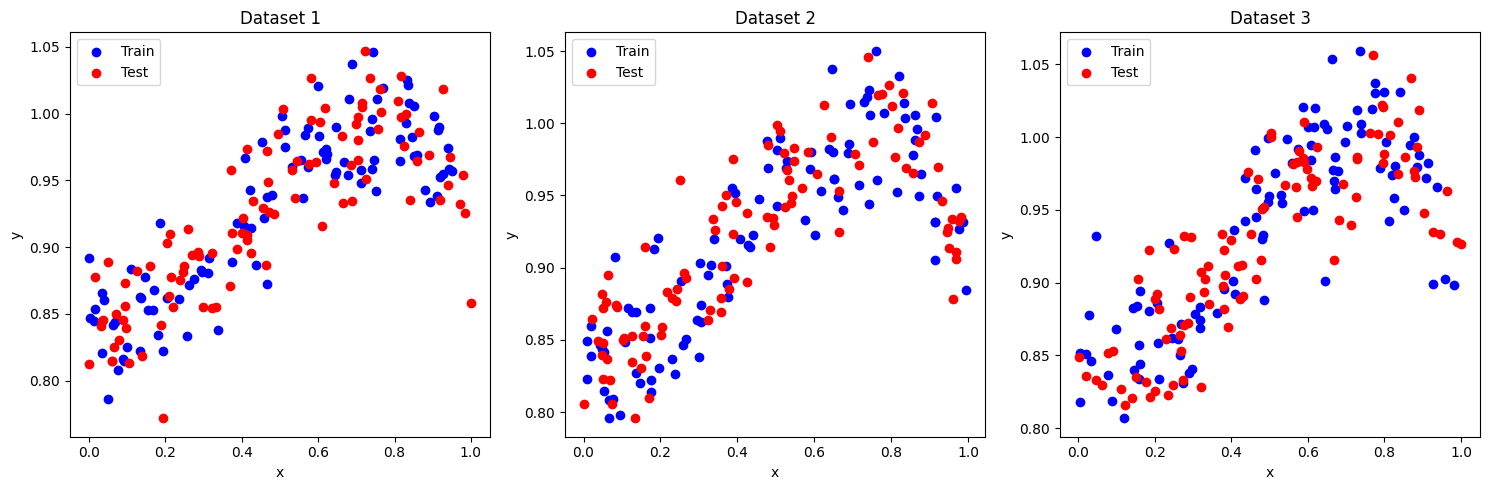

Dataset 1:

  Fit Round     E_in    E_out
0        h1  0.00115  0.00154
1        h2  0.00096  0.00119
2        h3  0.00072  0.00087
3        h4  0.00071  0.00091
4        h5  0.00071  0.00090
5        h6  0.00071  0.00090
6        h7  0.00070  0.00088
7        h8  0.00065  0.00143
8        h9  0.00065  0.00188

--------------------------------------------------

Dataset 2:

  Fit Round     E_in    E_out
0        h1  0.00159  0.00175
1        h2  0.00119  0.00118
2        h3  0.00084  0.00084
3        h4  0.00084  0.00084
4        h5  0.00083  0.00083
5        h6  0.00083  0.00083
6        h7  0.00082  0.00080
7        h8  0.00078  0.00084
8        h9  0.00076  0.00092

--------------------------------------------------

Dataset 3:

  Fit Round     E_in    E_out
0        h1  0.00174  0.00137
1        h2  0.00144  0.00113
2        h3  0.00086  0.00091
3        h4  0.00086  0.00093
4        h5  0.00085  0.00093
5        h6  0.00082  0.00099
6        h7  0.00082  0.00098
7        h8  0.000

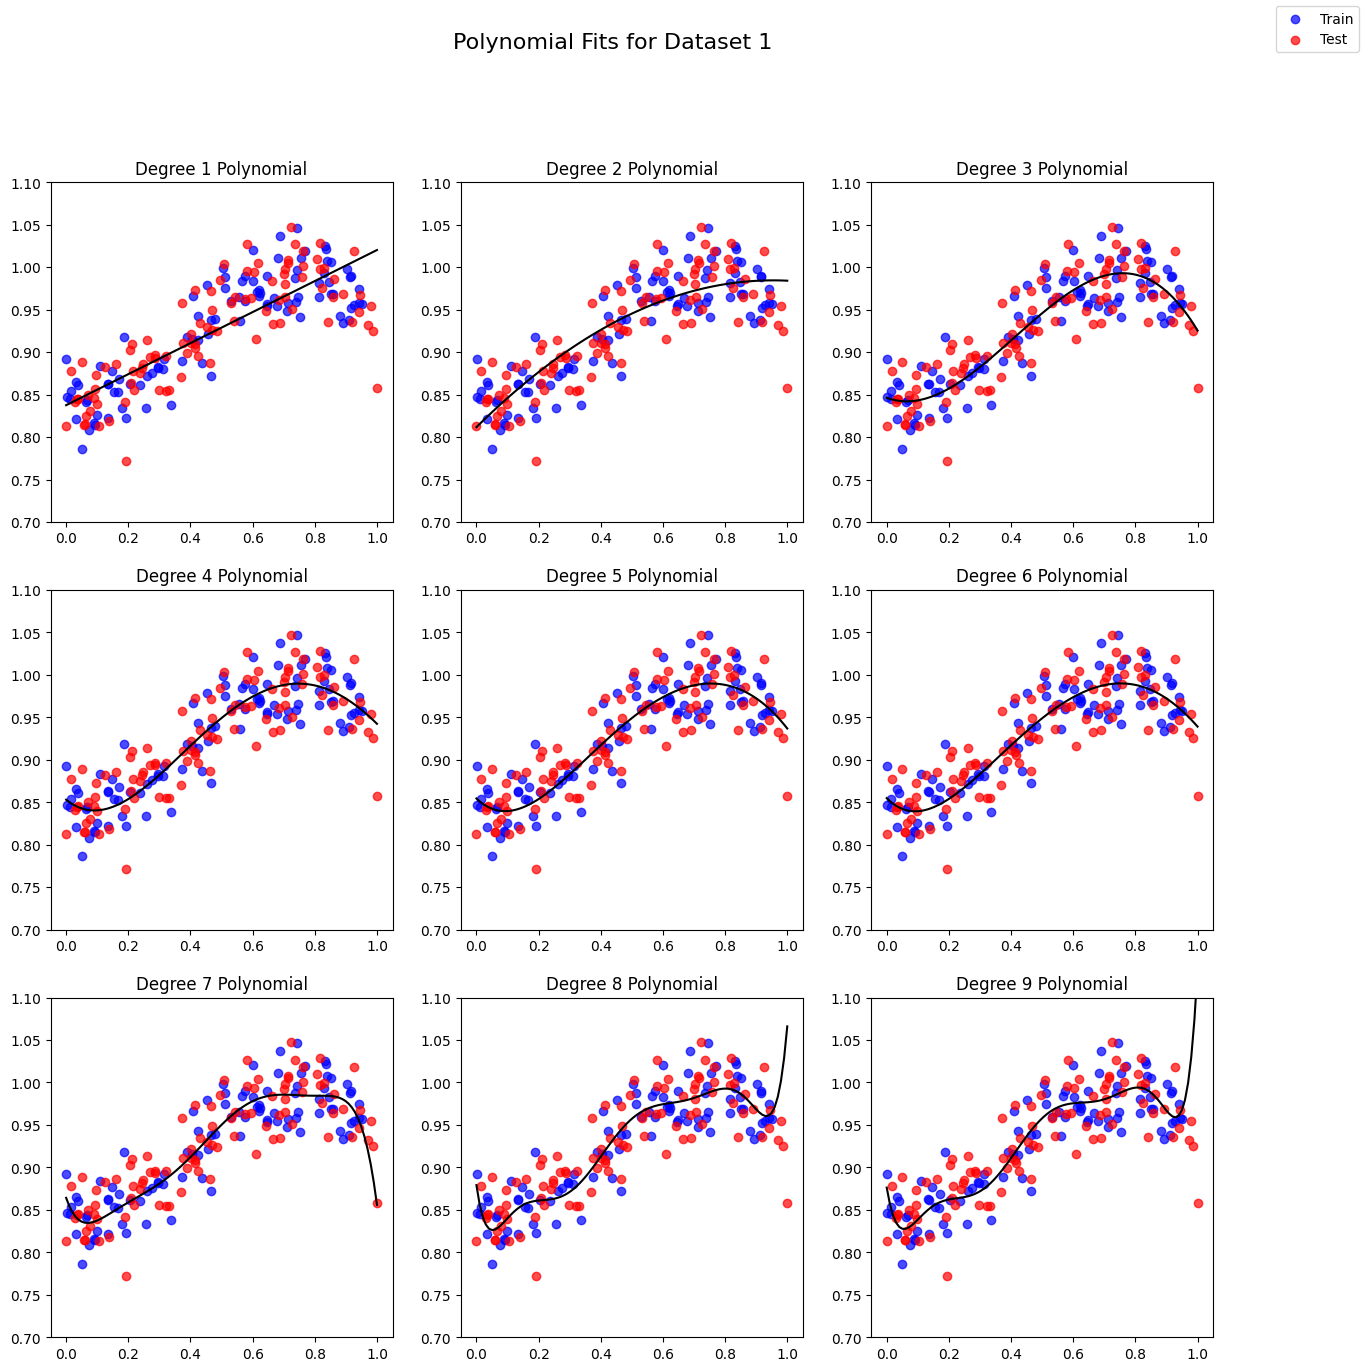

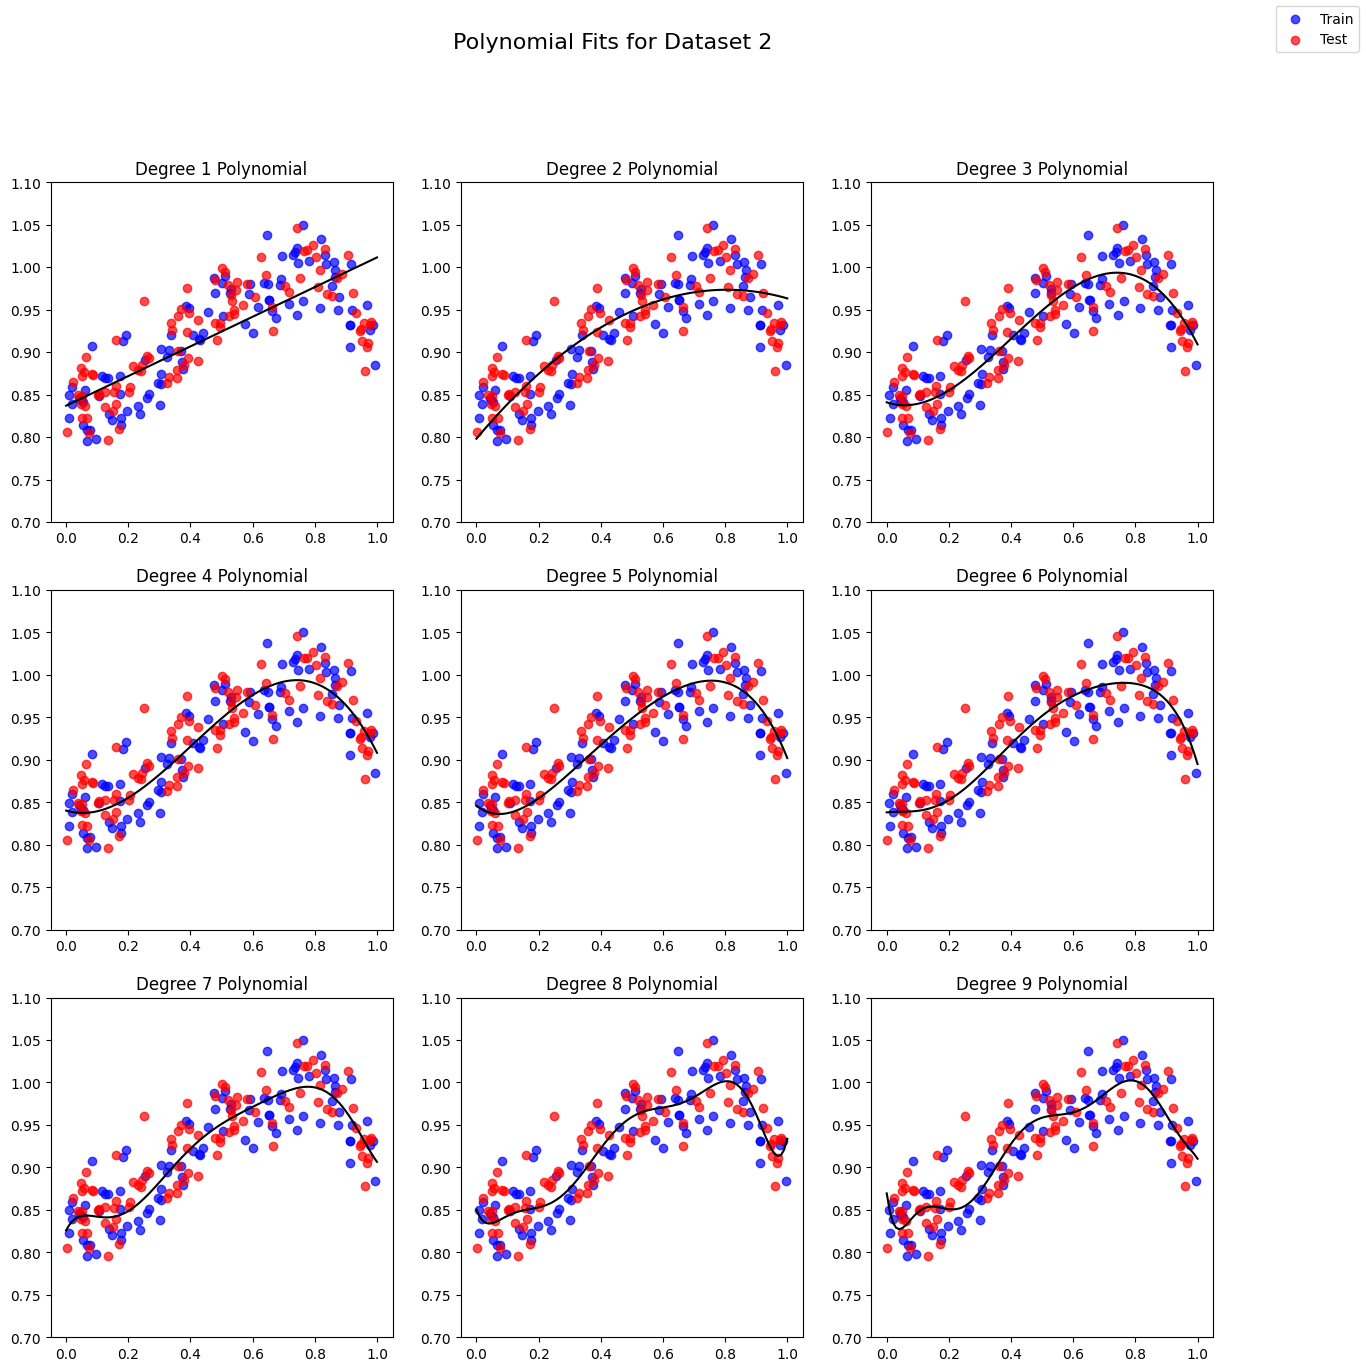

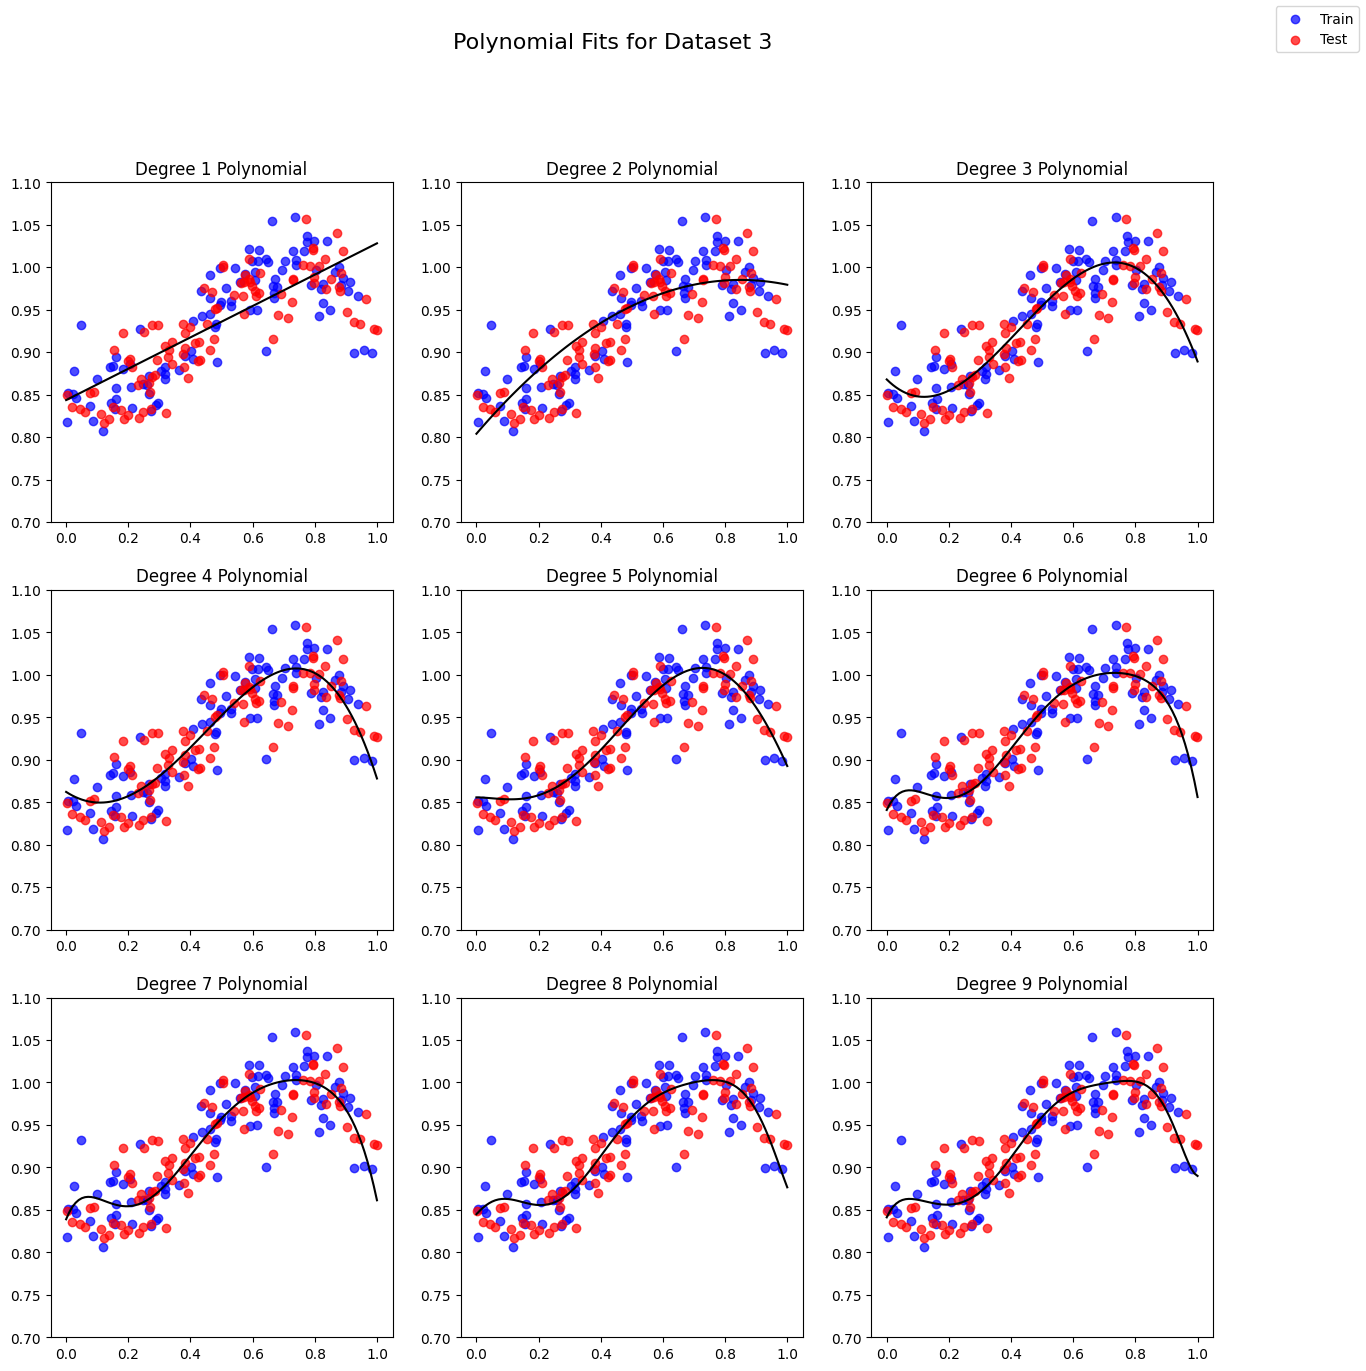

In [23]:
num_datasets = 3
num_points = 100
sigma = 0.03

datasets = []

for _ in range(num_datasets):
    train_set, test_set = generate_dataset()
    datasets.append({'train': train_set, 'test': test_set})

plot_datasets(datasets)

results = calculate_errors_and_create_table(datasets)

# Print results
for dataset_num, df in results:
    print(f"Dataset {dataset_num}:\n")
    print(df)
    print("\n" + "-"*50 + "\n")

# Plot polynomial fits
plot_polynomial_fits(datasets)

### Kích thước dataset là 1000 điểm

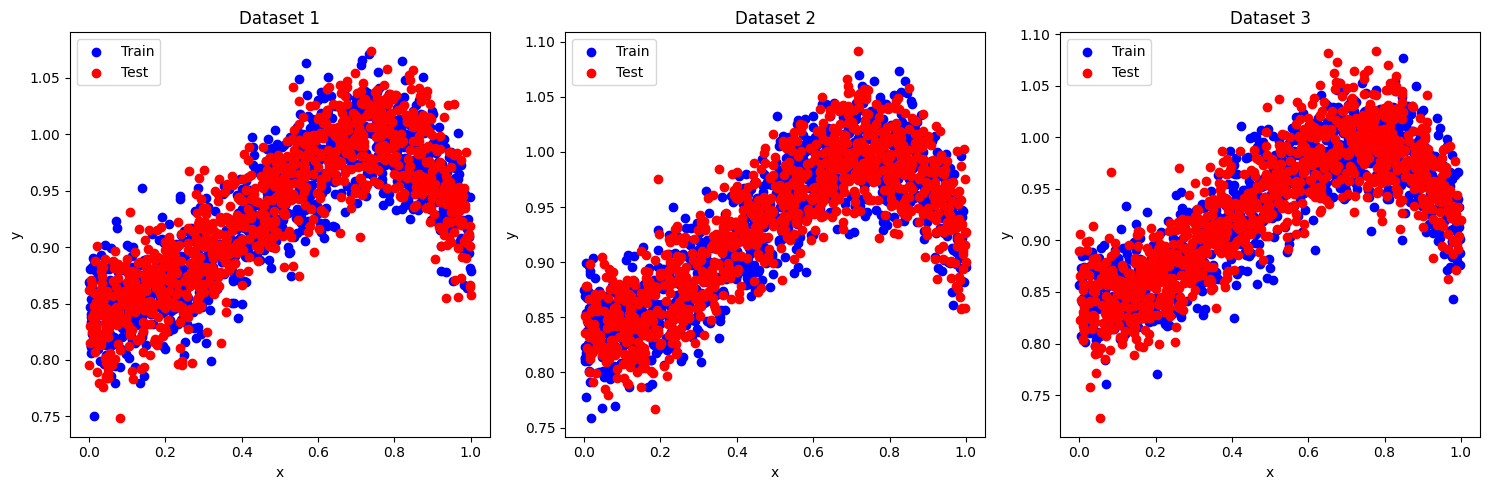

Dataset 1:

  Fit Round     E_in    E_out
0        h1  0.00167  0.00173
1        h2  0.00127  0.00126
2        h3  0.00091  0.00093
3        h4  0.00091  0.00091
4        h5  0.00091  0.00091
5        h6  0.00091  0.00091
6        h7  0.00091  0.00091
7        h8  0.00091  0.00091
8        h9  0.00090  0.00091

--------------------------------------------------

Dataset 2:

  Fit Round     E_in    E_out
0        h1  0.00167  0.00181
1        h2  0.00129  0.00126
2        h3  0.00091  0.00093
3        h4  0.00091  0.00093
4        h5  0.00091  0.00094
5        h6  0.00091  0.00094
6        h7  0.00091  0.00094
7        h8  0.00091  0.00094
8        h9  0.00091  0.00094

--------------------------------------------------

Dataset 3:

  Fit Round     E_in    E_out
0        h1  0.00164  0.00170
1        h2  0.00117  0.00129
2        h3  0.00085  0.00094
3        h4  0.00085  0.00094
4        h5  0.00085  0.00094
5        h6  0.00085  0.00094
6        h7  0.00085  0.00094
7        h8  0.000

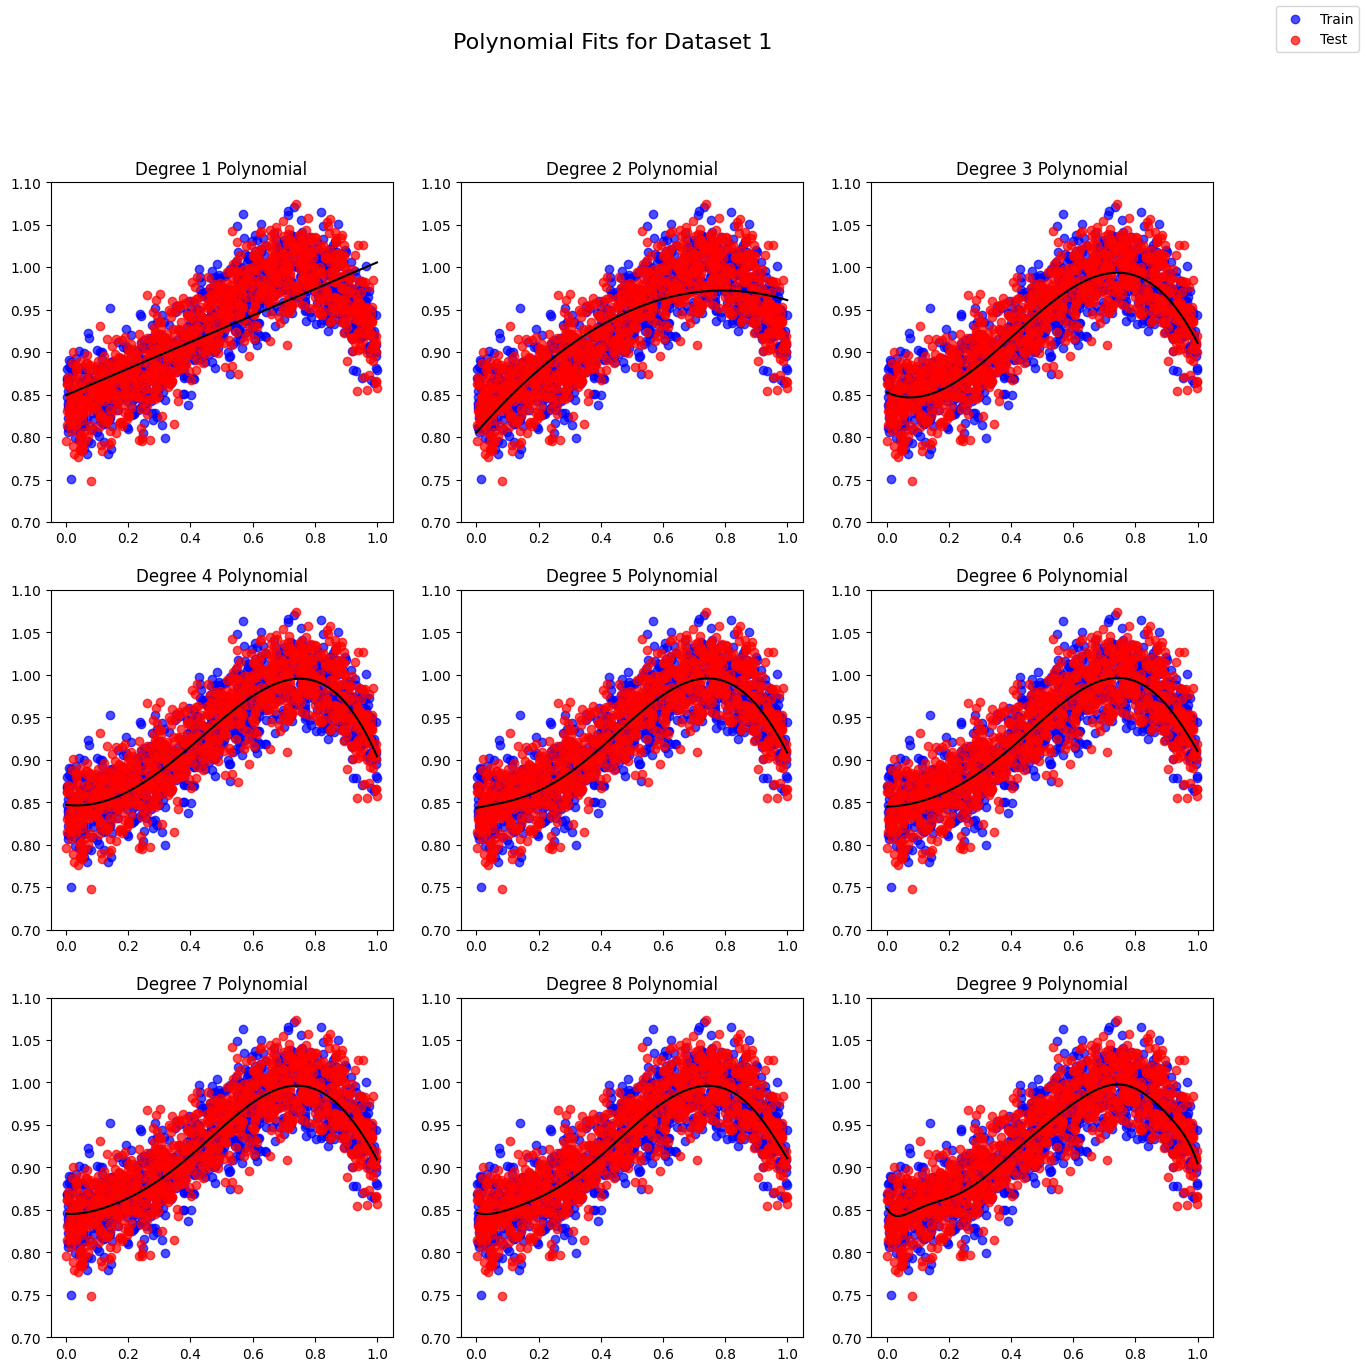

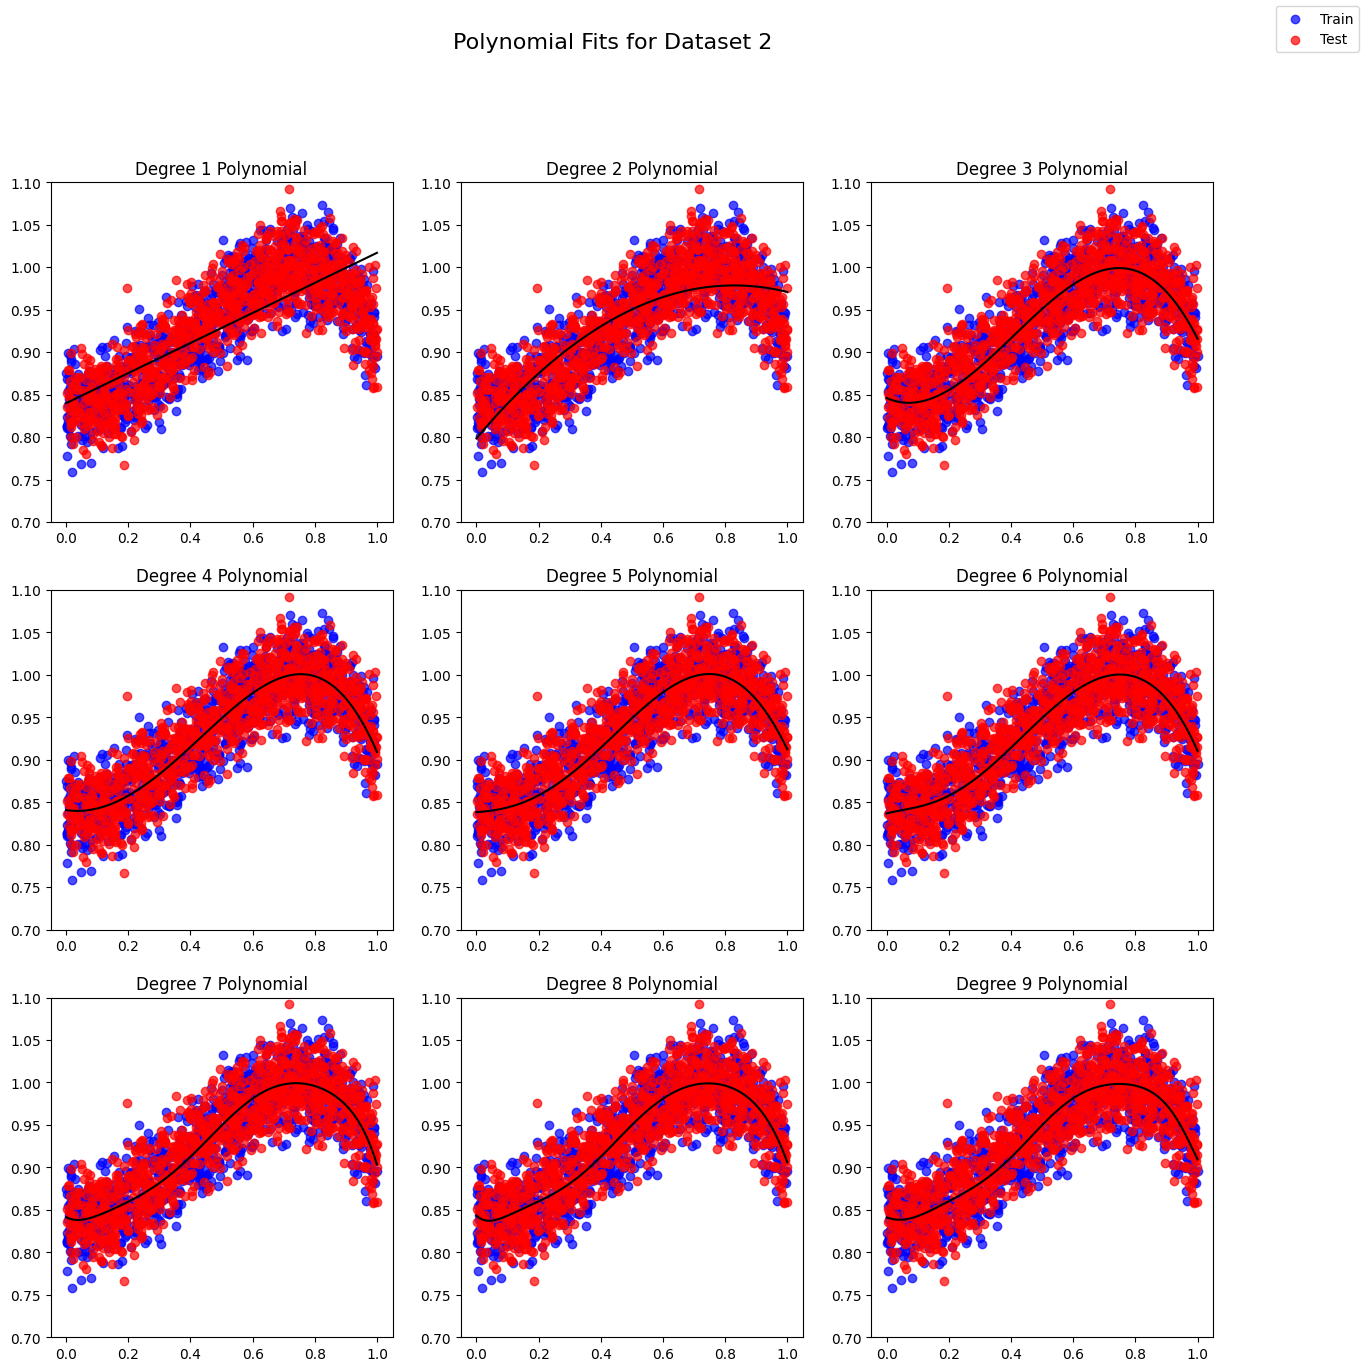

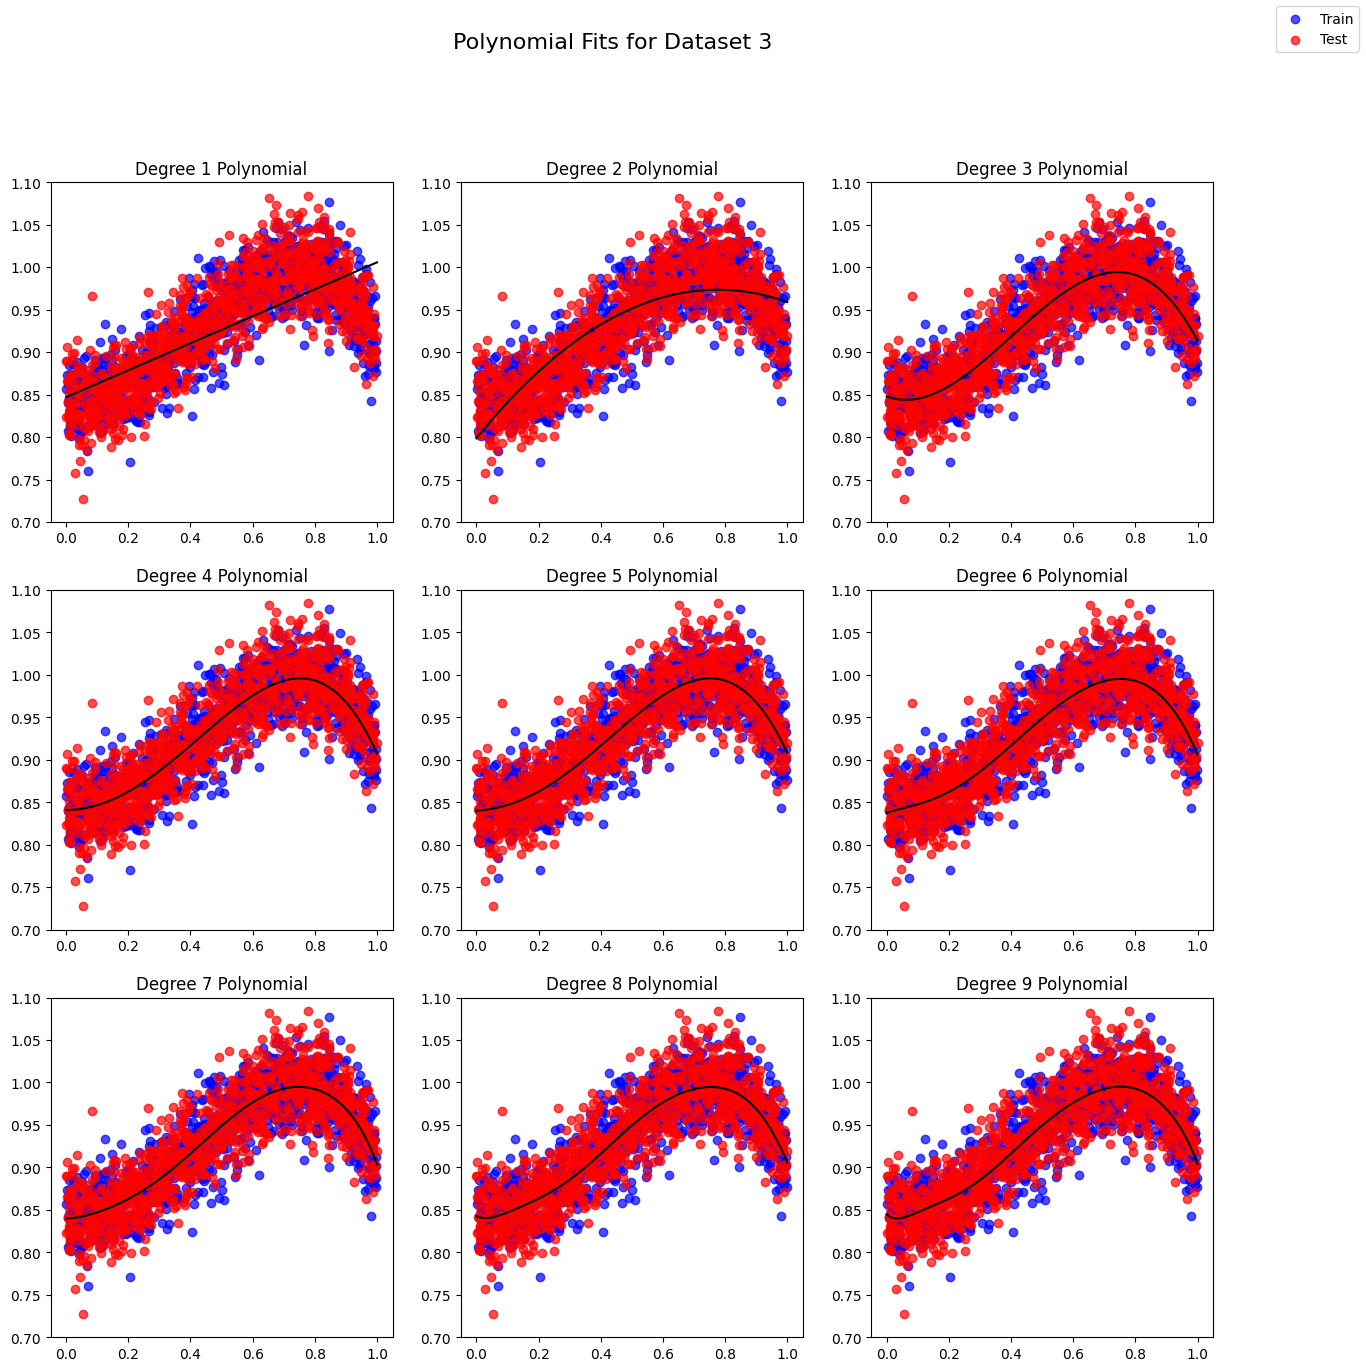

In [24]:
num_datasets = 3
num_points = 1000
sigma = 0.03

datasets = []

for _ in range(num_datasets):
    train_set, test_set = generate_dataset()
    datasets.append({'train': train_set, 'test': test_set})

plot_datasets(datasets)

results = calculate_errors_and_create_table(datasets)

# Print results
for dataset_num, df in results:
    print(f"Dataset {dataset_num}:\n")
    print(df)
    print("\n" + "-"*50 + "\n")

# Plot polynomial fits
plot_polynomial_fits(datasets)

### Kích thước dataset là 10000 điểm

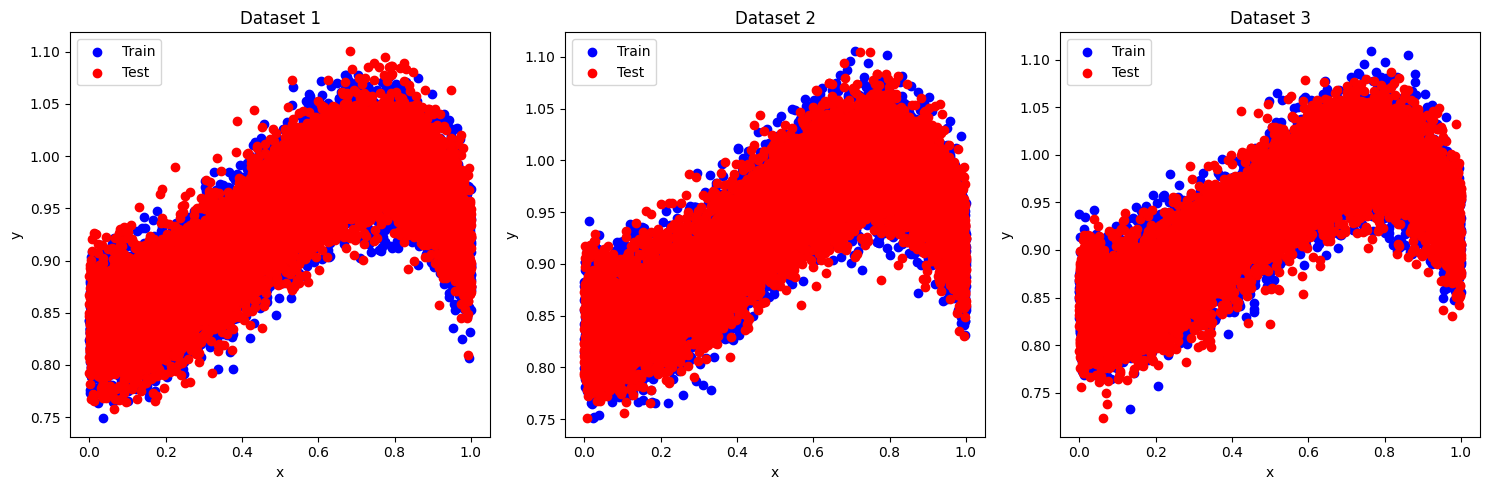

Dataset 1:

  Fit Round     E_in    E_out
0        h1  0.00170  0.00169
1        h2  0.00127  0.00126
2        h3  0.00091  0.00092
3        h4  0.00090  0.00091
4        h5  0.00090  0.00091
5        h6  0.00090  0.00091
6        h7  0.00090  0.00091
7        h8  0.00090  0.00091
8        h9  0.00090  0.00091

--------------------------------------------------

Dataset 2:

  Fit Round     E_in    E_out
0        h1  0.00175  0.00168
1        h2  0.00128  0.00125
2        h3  0.00091  0.00091
3        h4  0.00091  0.00090
4        h5  0.00091  0.00090
5        h6  0.00091  0.00090
6        h7  0.00091  0.00090
7        h8  0.00091  0.00090
8        h9  0.00091  0.00090

--------------------------------------------------

Dataset 3:

  Fit Round     E_in    E_out
0        h1  0.00165  0.00171
1        h2  0.00125  0.00127
2        h3  0.00091  0.00092
3        h4  0.00091  0.00091
4        h5  0.00091  0.00091
5        h6  0.00091  0.00091
6        h7  0.00091  0.00091
7        h8  0.000

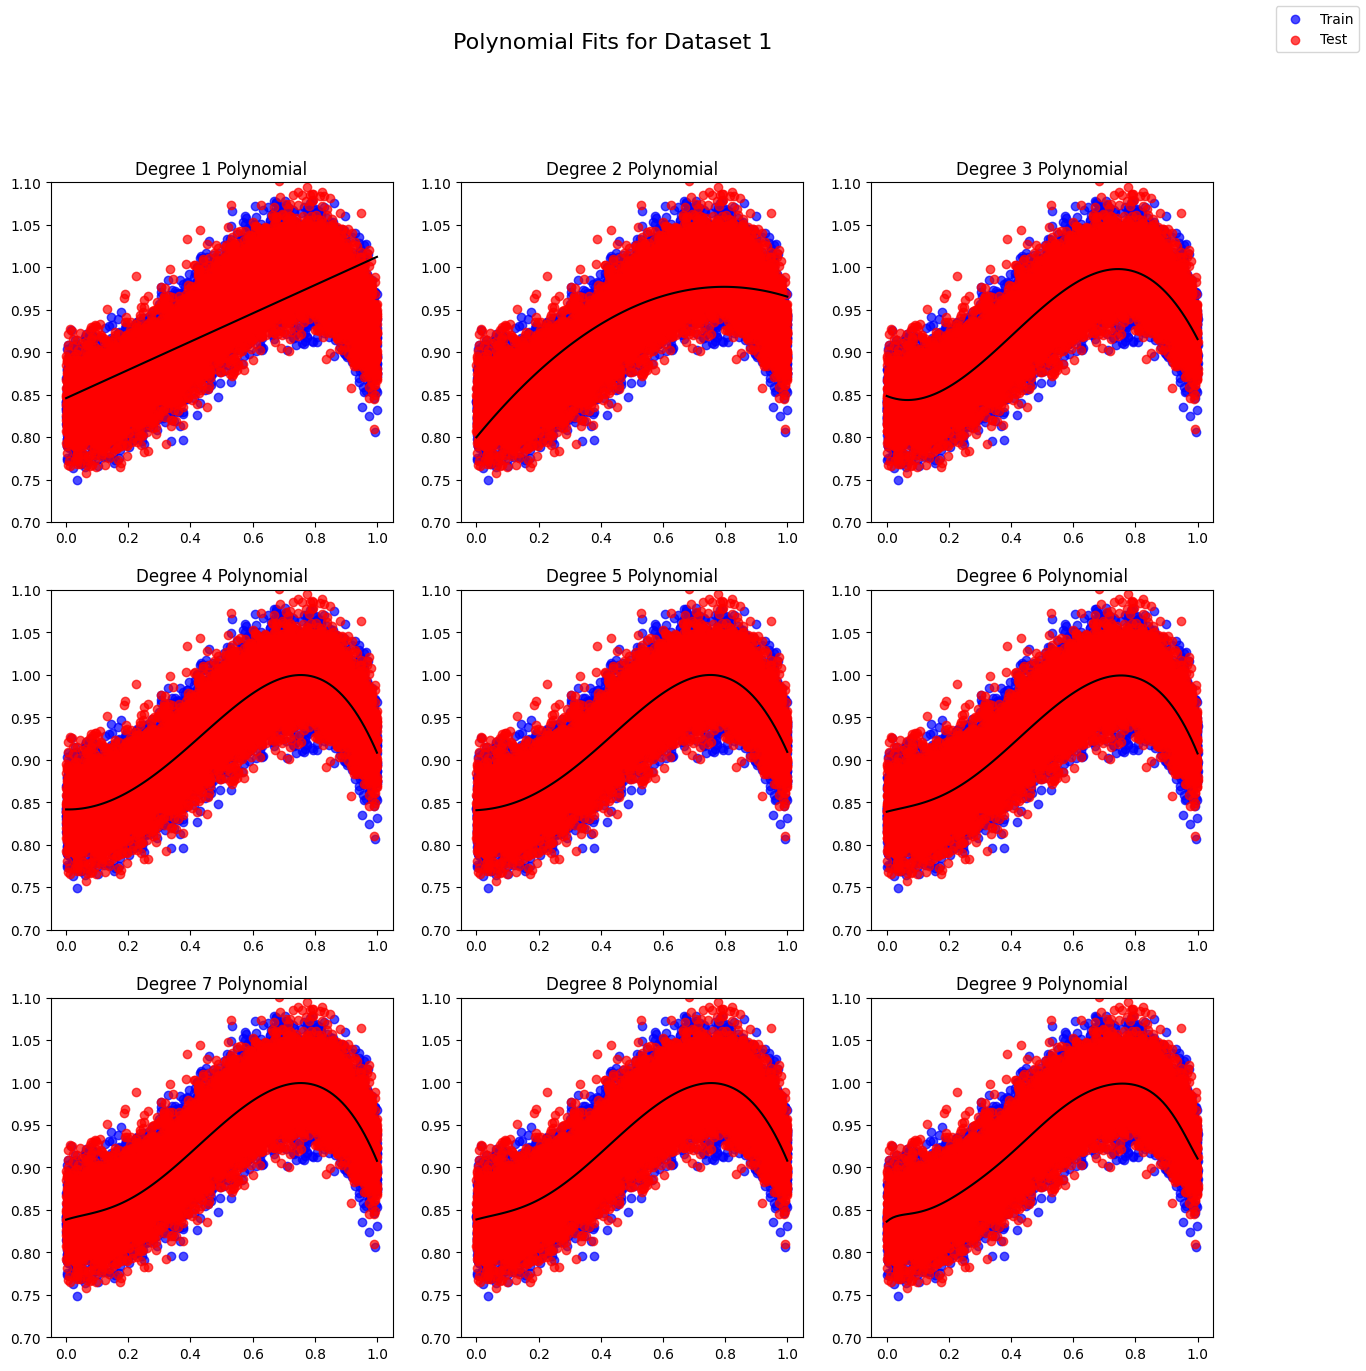

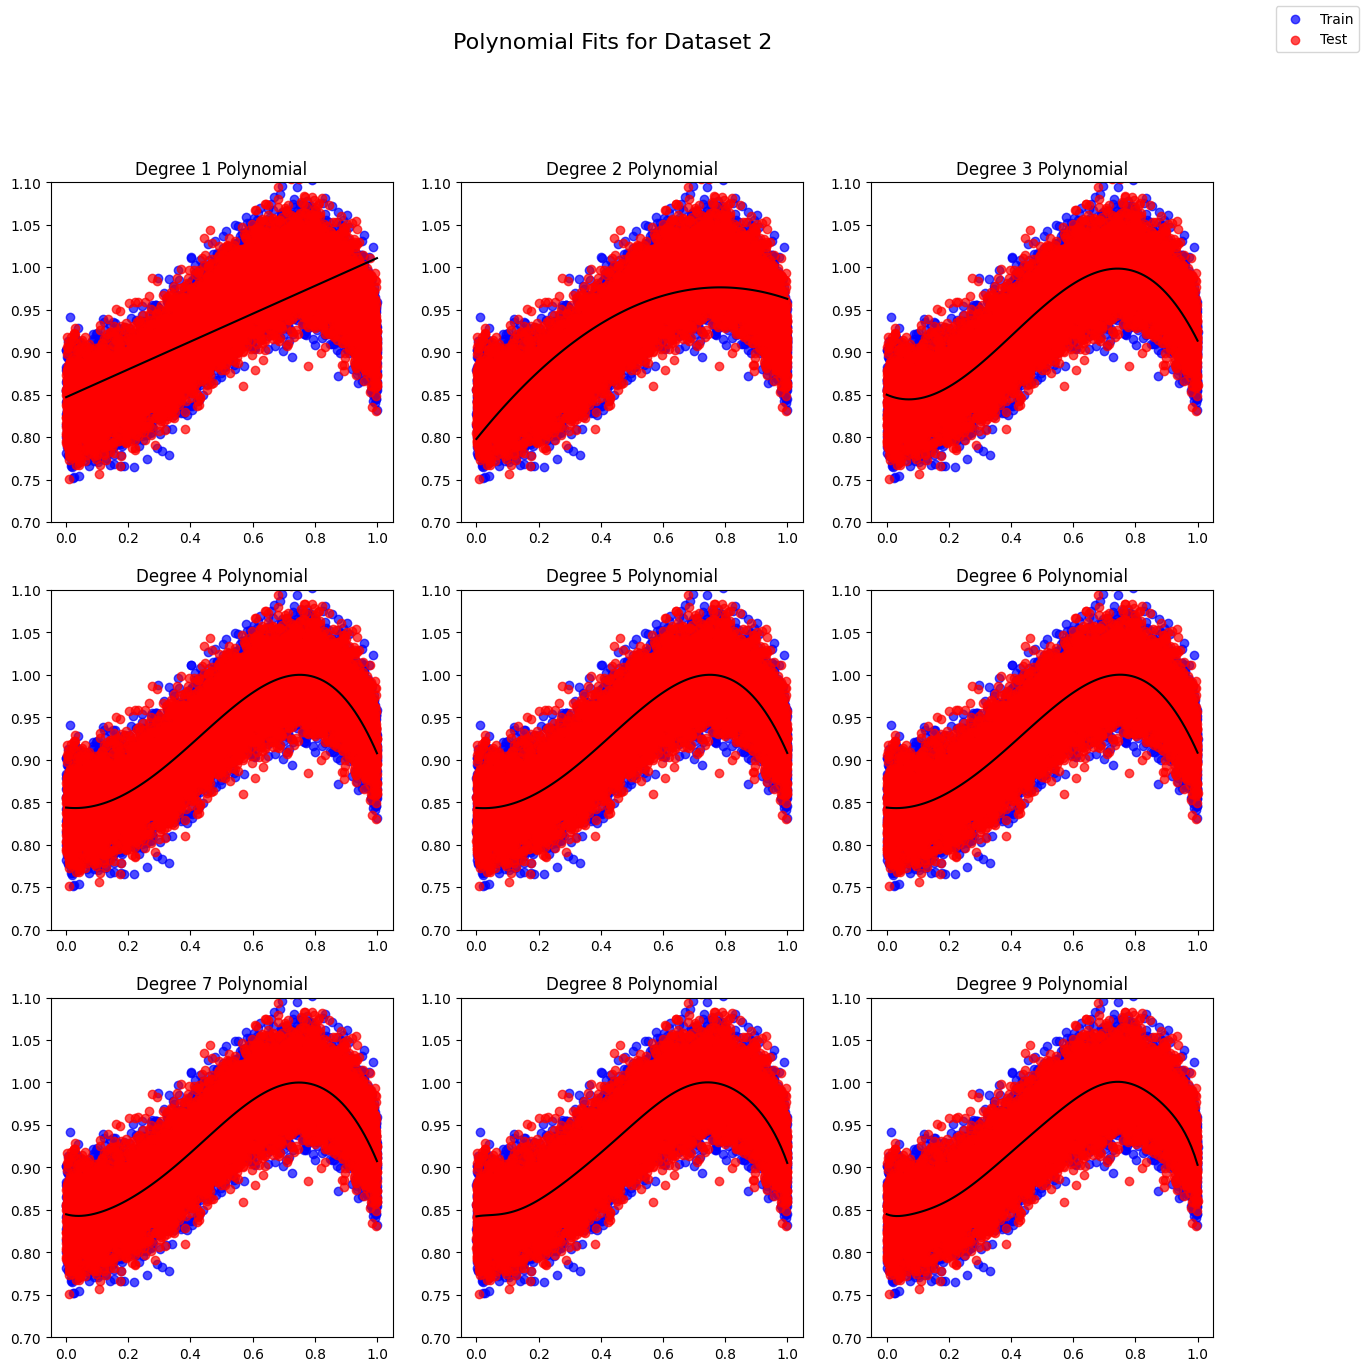

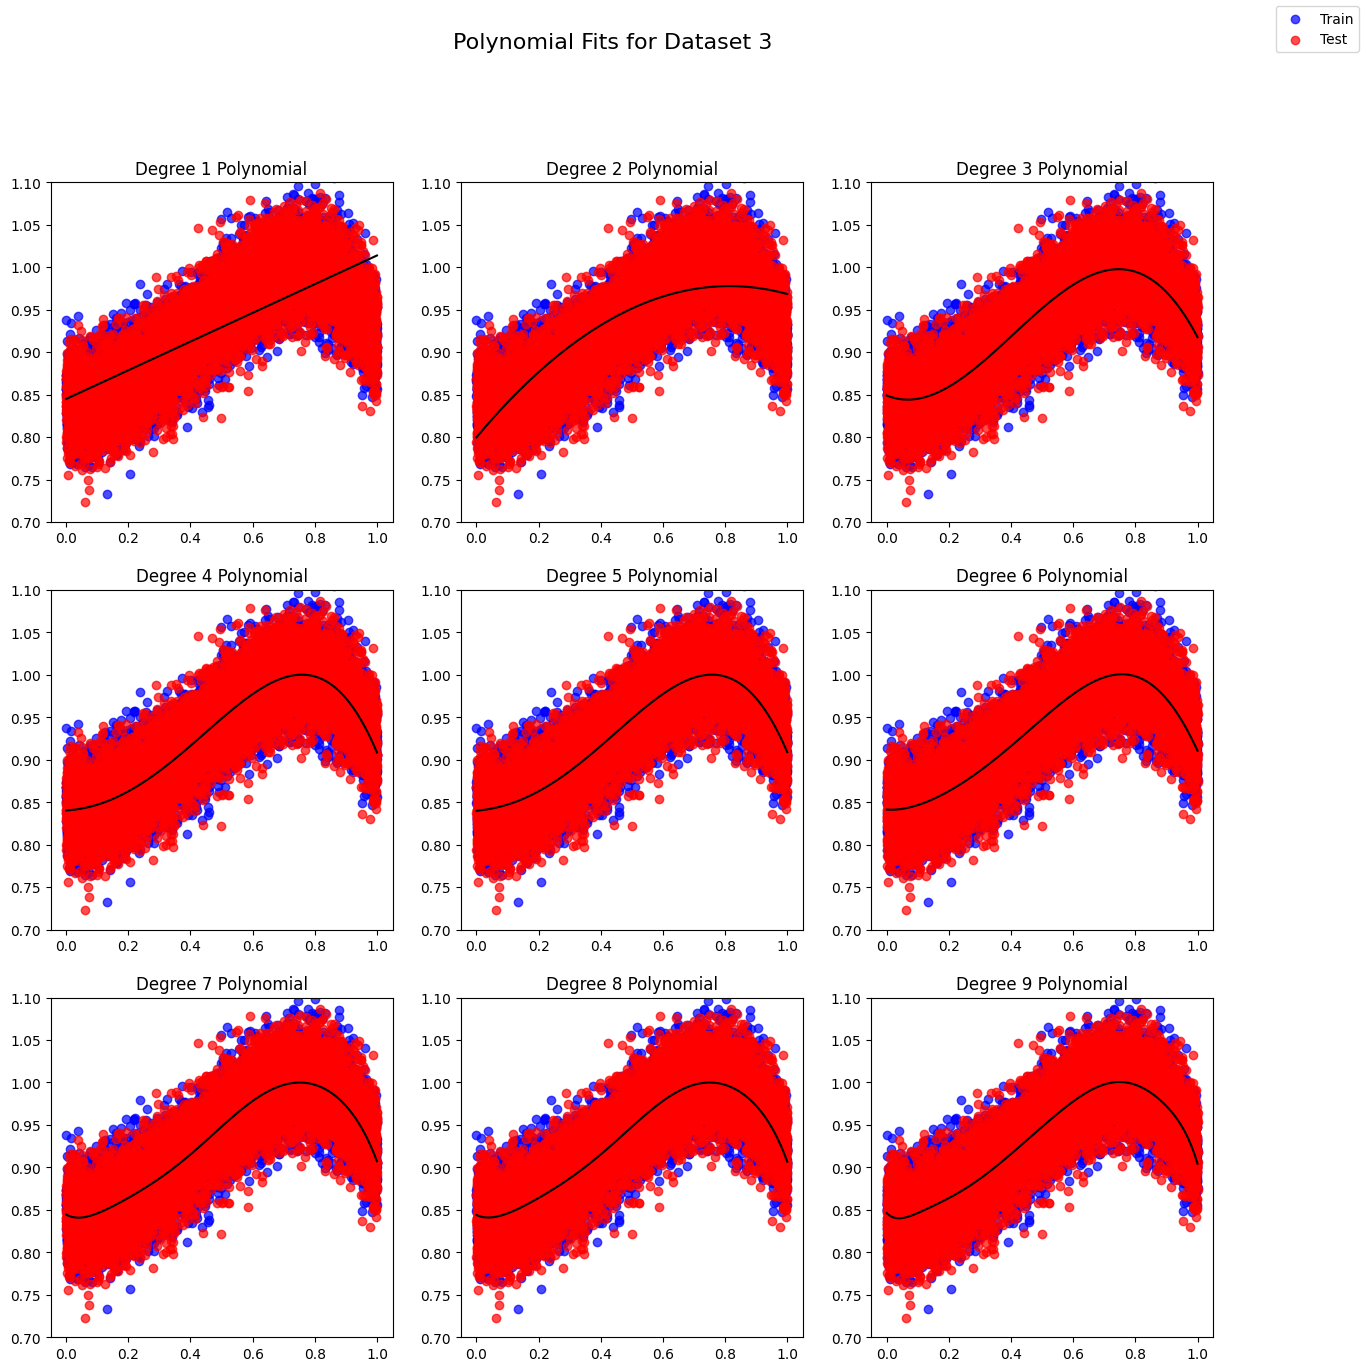

In [25]:
num_datasets = 3
num_points = 10000
sigma = 0.03

datasets = []

for _ in range(num_datasets):
    train_set, test_set = generate_dataset()
    datasets.append({'train': train_set, 'test': test_set})

plot_datasets(datasets)

results = calculate_errors_and_create_table(datasets)

# Print results
for dataset_num, df in results:
    print(f"Dataset {dataset_num}:\n")
    print(df)
    print("\n" + "-"*50 + "\n")

# Plot polynomial fits
plot_polynomial_fits(datasets)

### Thu hoạch và trả lời câu hỏi

#### Bias và variance là gì

- Bias (độ chệch) là sự sai khác giữa giá trị dự báo và giá trị thực tế. Khi xây dựng mô hình chúng ta mong muốn sẽ tạo ra độ chệch thấp. Điều đó đồng nghĩa với giá trị dự báo sẽ gần với ground truth hơn. Các mô hình đơn giản khi train trên những tập dữ liệu lớn thường có bias lớn do bản thân mô hình không biểu diễn được đầy đủ mối quan hệ phức tạp của dữ liệu.
- Phương sai được hiểu là hiện tượng mô hình dự báo ra giá trị có mức độ dao động lớn. Nó khớp với hầu hết dữ liệu trên tập train nhưng không gần giá trị truth mà chỉ dao động quanh nó. Những lớp mô hình phức tạp được huấn luyện trên tập huấn luyện nhỏ thường xảy ra hiện tượng phương sai cao và dẫn tới việc học giả mạo thông qua bắt chước dữ liệu hơn là học qui luật tổng quát.

#### Nhận xét về bias và variance của mô hình

- Với các dataset có 10 điểm dữ liệu, khi tăng bậc của model, nó biểu diễn tốt hơn dữ liệu. Bias giảm dần qua các round.
- Đồng thời, variance tăng qua các round. Các giá trị dự đoán chệch lớn so với tập test.

Sau khi tăng kích thước tập train và test từ 10 lên 100 và 1000, ta nhận thấy

- Tăng kích thước tập train và test không làm giảm bias của model, dễ dàng ta thấy, tại round 1 của các tập có nhiều điểm dữ liệu hơn, bias đều giống như nhau. Bias giảm qua các round do mô hình phức tạp hơn và nắm bắt được dữ liệu tốt hơn. Dữ liệu càng lớn, độ lệch với các điểm train càng nhiều
- Tăng kích thước tập train và test làm giảm variance của model. Round 9 của mô hình khi dữ liệu lớn mô tả đúng quy luật tổng quát của dữ liệu (là một đường hình sin) chứ không chệch lớn khi train ở các tập dữ liệu nhỏ hơn.